In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [346]:
import random

x = []
err = []
for i in range(100):
    r = random.randrange(1, 40)
    x.append(r)
err = np.random.normal(0, 100, 100)

data = pd.DataFrame({'X':x})
data['y'] = data['X']**2 -15*data['X'] + 20 + err

data.head()

,X,y
0,30,473.915902
1,4,-86.784127
2,22,227.499241
3,36,717.843538
4,28,290.009299


In [347]:
input=data['X']
output=data['y']

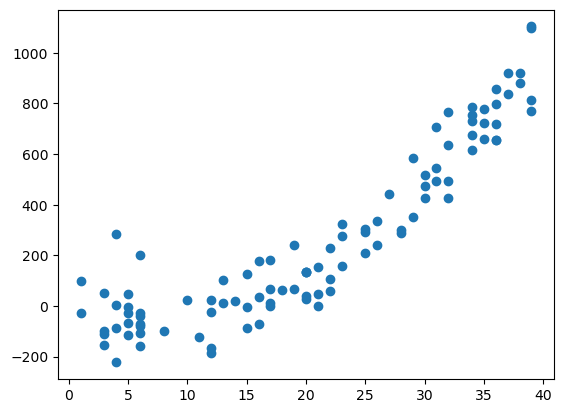

In [348]:
plt.scatter(input,output)

In [349]:
input=np.array(input)
output=np.array(output) #linear regression need numpy form

In [350]:
input=input.reshape(-1,1)
output=output.reshape(-1,1)

In [351]:
from sklearn.preprocessing import PolynomialFeatures

PF = PolynomialFeatures(degree=2, include_bias=False)
input_2 = PF.fit_transform(input)

In [352]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output=train_test_split(input_2,output)

In [353]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [354]:
LR.fit(train_input,train_output)

LinearRegression()

In [355]:
LR.coef_, LR.intercept_ # number of room vs housing price

(array([[-10.75824081,   0.93926334]]), array([-39.12512679]))

## 주의할 점: coef_의 첫 번째값이 ${X}$의 계수,
## 두 번째 값이 ${X^2}$의 계수이다.

In [357]:
LR.coef_[0][0], LR.coef_[0][1]

(-10.758240807018712, 0.9392633430648522)

In [358]:
X=np.arange(min(input),max(input))
X

/var/folders/9s/8k2z9pss5p9873711mvhgfqc0000gn/T/ipykernel_34644/2121426905.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X=np.arange(min(input),max(input))


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38])

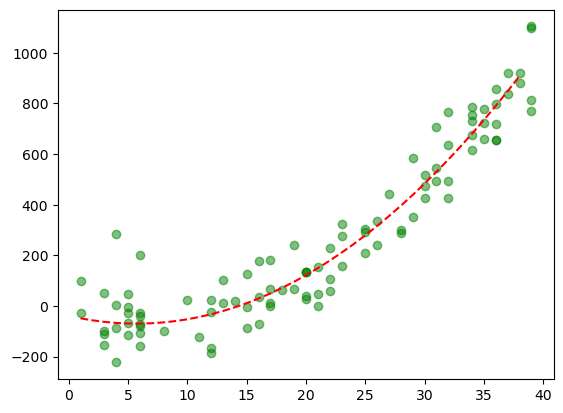

In [359]:
plt.scatter(input,output, color='g', alpha=0.5)
plt.plot(X,LR.coef_[0][1]*(X**2)+LR.coef_[0][0]*(X)+LR.intercept_,'r--')